In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot



In [3]:
# Constants
SEASON_2017_START = '2016-10-25'
SEASON_2017_END = '2017-04-14'
SEASON_2018_START = '2017-10-17'
SEASON_2018_END = '2018-04-14'
SEASON_2019_START = '2018-10-18'
SEASON_2019_END = '2019-04-12'
SEASON_2020_START = '2019-10-22'
SEASON_2020_END = '2020-08-15'
SEASON_2021_START = '2020-12-22'
SEASON_2021_END = '2021-05-16'

## Player Functions

In [7]:
# glossary:
"""GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV
"""


'GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV\n'

In [6]:
# get game logs for tatum
tatum_2018 = get_game_logs('Jayson Tatum', SEASON_2018_START, SEASON_2018_END, playoffs=False)
tatum_2019 = get_game_logs('Jayson Tatum', SEASON_2019_START, SEASON_2019_END, playoffs=False)
tatum_2020 = get_game_logs('Jayson Tatum', SEASON_2020_START, SEASON_2020_END, playoffs=False)
tatum_2021 = get_game_logs('Jayson Tatum', SEASON_2021_START, SEASON_2021_END, playoffs=False)

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:



In [7]:
tatum_2018['GAME_SCORE'] = tatum_2018['GAME_SCORE'].astype(float)
tatum_2019['GAME_SCORE'] = tatum_2019['GAME_SCORE'].astype(float)
tatum_2020['GAME_SCORE'] = tatum_2020['GAME_SCORE'].astype(float)
tatum_2021['GAME_SCORE'] = tatum_2021['GAME_SCORE'].astype(float)

In [32]:
tatum['GAME_SCORE'].max()
#tatum['GAME_SCORE'].min()

47.9

In [37]:
best_game = tatum[tatum['GAME_SCORE'] > 40]
best_game

,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
54,2021-04-09 00:00:00,23-037,BOS,HOME,MIN,W (+9),1,41:00,16,25,...,9,10,4,0,1,5,3,53,42.2,+5
66,2021-04-30 00:00:00,23-058,BOS,HOME,SAS,W (+3),1,45:20,20,37,...,6,8,5,0,1,0,2,60,47.9,+6
GAME_SCORE,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9,...,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9,47.9


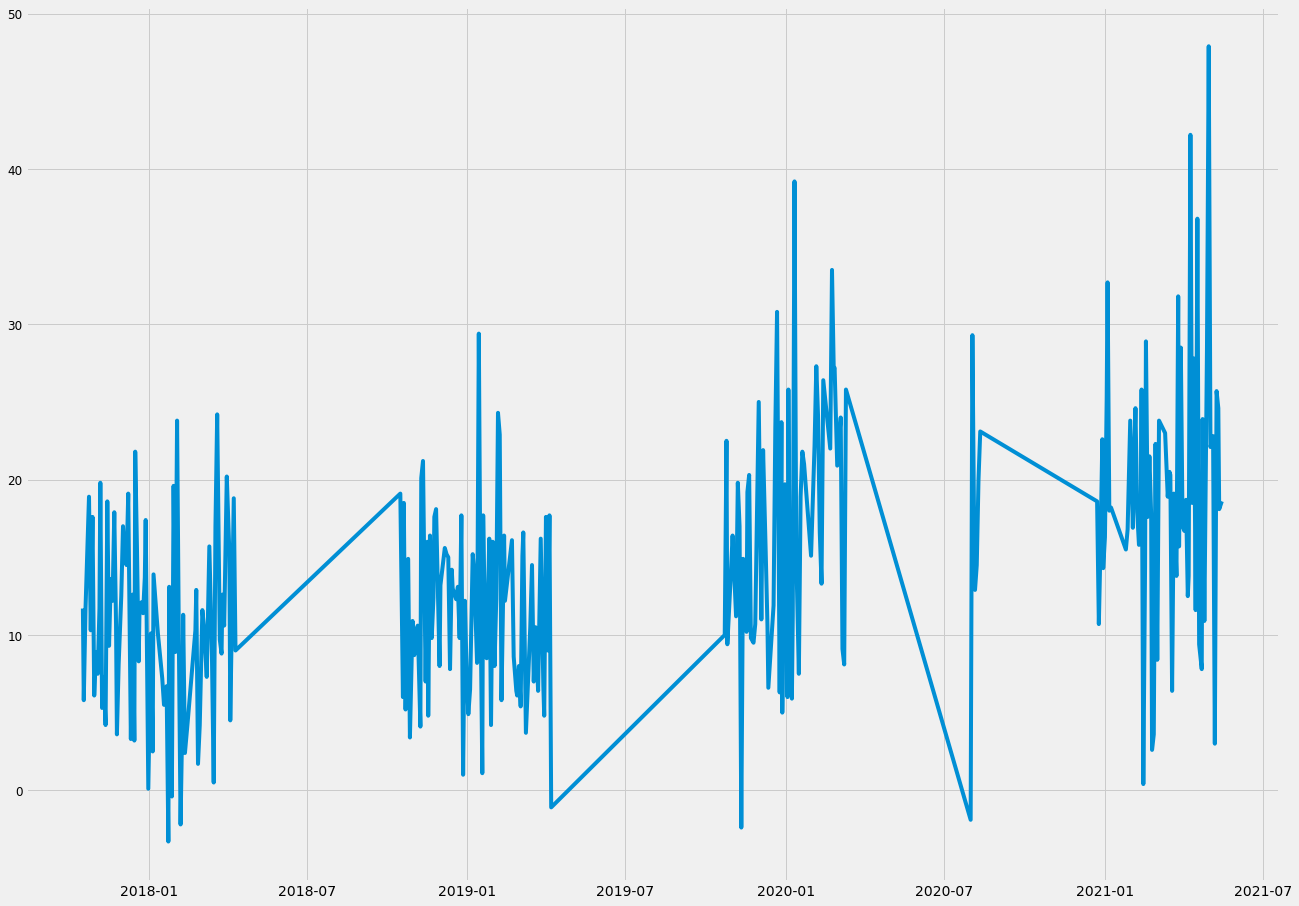

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.plot(tatum['DATE'], tatum['GAME_SCORE'])
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, '2021 Season')

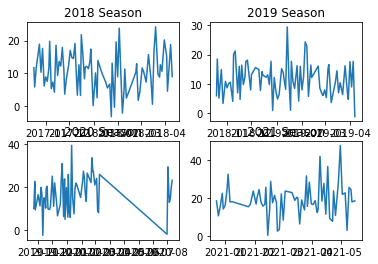

In [19]:
# subplots

# plot 1
plt.subplot(2, 2, 1)
plt.plot(tatum_2018['DATE'], tatum_2018['GAME_SCORE'])
plt.title("2018 Season")

# plot 2
plt.subplot(2, 2, 2)
plt.plot(tatum_2019['DATE'], tatum_2019['GAME_SCORE'])
plt.title("2019 Season")

# plot 3
plt.subplot(2, 2, 3)
plt.plot(tatum_2020['DATE'], tatum_2020['GAME_SCORE'])
plt.title("2020 Season")


# plot 4
plt.subplot(2, 2, 4)
plt.plot(tatum_2021['DATE'], tatum_2021['GAME_SCORE'])
plt.title("2021 Season")

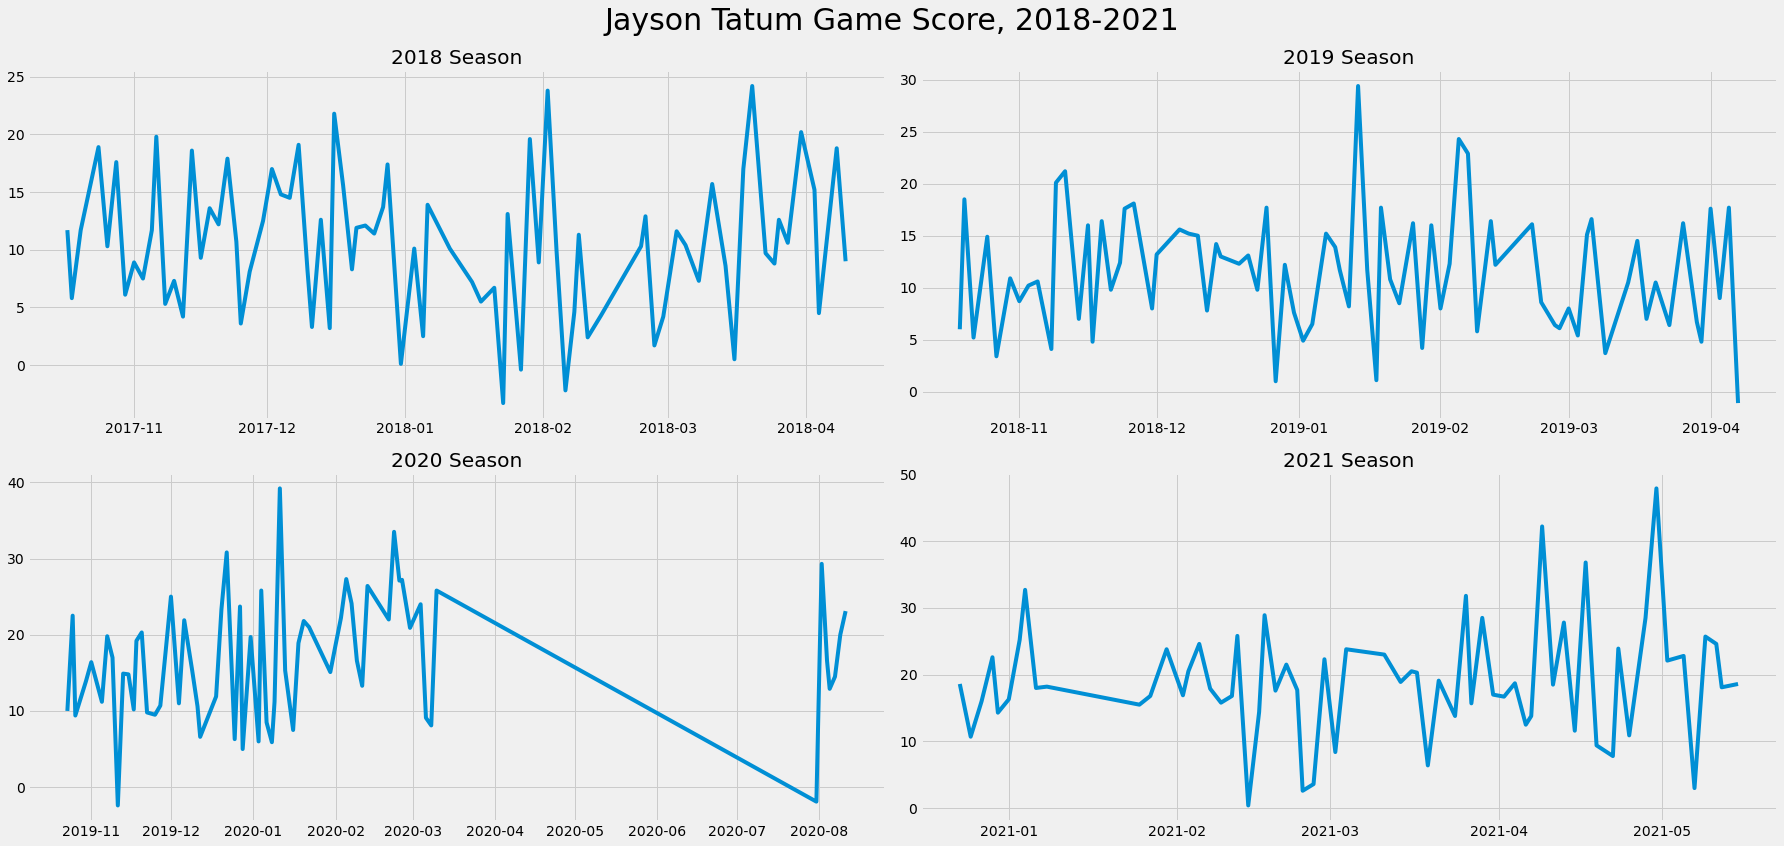

In [28]:
plt.style.use('fivethirtyeight')
f = plt.figure(figsize=(25,12))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

f.suptitle("Jayson Tatum Game Score, 2018-2021", fontsize=30)

ax.plot(tatum_2018['DATE'], tatum_2018['GAME_SCORE'])
ax2.plot(tatum_2019['DATE'], tatum_2019['GAME_SCORE'])
ax3.plot(tatum_2020['DATE'], tatum_2020['GAME_SCORE'])
ax4.plot(tatum_2021['DATE'], tatum_2021['GAME_SCORE'])

ax.title.set_text('2018 Season')
ax2.title.set_text('2019 Season')
ax3.title.set_text('2020 Season')
ax4.title.set_text('2021 Season')
f.tight_layout()

## Team Functions

In [38]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats,get_team_misc
df_bos_2021 = get_roster('BOS', 2021)
df_bos_2021.head()

,NUMBER,PLAYER,POS,HEIGHT,WEIGHT,BIRTH_DATE,NATIONALITY,EXPERIENCE,COLLEGE
0,7,Jaylen Brown,SG,6-6,223,1996-10-24,US,4,California
1,4,Carsen Edwards,SG,5-11,200,1998-03-12,US,1,Purdue
2,99,Tacko Fall,C,7-5,311,1995-12-10,SN,1,Central Florida
3,94,Evan Fournier,SG,6-7,205,1992-10-29,FR,8,NaN
4,43,Javonte Green,SG,6-4,205,1993-07-23,US,1,Radford


In [40]:
df_bos_2021_players = df_bos_2021['PLAYER'].to_list()
df_bos_2021_players

['Jaylen Brown',
 'Carsen Edwards',
 'Tacko Fall',
 'Evan Fournier',
 'Javonte Green',
 'Luke Kornet',
 'Romeo Langford',
 'Aaron Nesmith',
 'Semi Ojeleye',
 'Jabari Parker',
 'Payton Pritchard',
 'Marcus Smart',
 'Jayson Tatum',
 'Jeff Teague',
 'Daniel Theis',
 'Tristan Thompson',
 'Moritz Wagner',
 'Kemba Walker',
 'Tremont Waters',
 'Grant Williams',
 'Robert Williams']